In [19]:
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import numpy as np
 
#Load Data with pandas, and parse the first column into datetime
all_data=pd.read_csv('train2.csv', sep='^', parse_dates = ['Dates'])

In [2]:
all_data = all_data[all_data.X != -120.5]

In [3]:
#Convert crime labels to numbers
le_crime = preprocessing.LabelEncoder()
all_data['crime'] = le_crime.fit_transform(all_data.Category)

In [4]:
train, non_train = train_test_split(all_data, train_size=.60,random_state=42)
valid, test = train_test_split(non_train,train_size=.50,random_state=42)

In [5]:
max_Y = max(train.Y)
min_Y = min(train.Y)
max_X = max(train.X)
min_X = min(train.X)

In [6]:
# Change this to change grid size
grid_size = 20
#Get binarized weekdays, districts, and hours.
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour,prefix="hour") 
month = train.Dates.dt.month
month = pd.get_dummies(month,prefix="month")

train['grid_X'] = pd.DataFrame((train.X - min_X)/(max_X - min_X) * grid_size).astype(int)
train['grid_Y'] = ((train.Y - min_Y)/(max_Y - min_Y) * grid_size).astype(int)
grid_features = pd.get_dummies(train.grid_X).join(pd.get_dummies(train.grid_Y),lsuffix="_X",rsuffix="_Y")

#Build new array
train_data = pd.concat([hour, days, month, grid_features, district], axis=1)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:

#Repeat for test data
days = pd.get_dummies(valid.DayOfWeek)
district = pd.get_dummies(valid.PdDistrict)

hour = valid.Dates.dt.hour
hour = pd.get_dummies(hour,prefix="hour") 
month = valid.Dates.dt.month
month = pd.get_dummies(month,prefix="month")

valid['grid_X'] = ((valid.X - min_X)/(max_X - min_X) * grid_size).astype(int)
valid['grid_Y'] = ((valid.Y - min_Y)/(max_Y - min_Y) * grid_size).astype(int)
grid_features = pd.get_dummies(valid.grid_X).join(pd.get_dummies(valid.grid_Y),lsuffix="_X",rsuffix="_Y")

valid_data = pd.concat([hour, days, month, grid_features, district], axis=1)
#valid_data['crime']=valid_crime

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
features = ['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9',
            'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19',
            'hour_20','hour_21','hour_22','hour_23','month_1','month_2','month_3','month_4','month_5','month_6',
            'month_7','month_8','month_9','month_10','month_11','month_12',
            '0_X','1_X','2_X','3_X','4_X','5_X','6_X','7_X','8_X','9_X','10_X','11_X',
            '12_X','13_X','14_X','15_X','16_X','17_X','18_X','19_X',
            '0_Y','1_Y','2_Y','3_Y','4_Y','5_Y','6_Y','7_Y','8_Y','9_Y','10_Y','11_Y',
            '12_Y','13_Y','14_Y','15_Y','16_Y','17_Y','18_Y','19_Y',
            'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
 'Wednesday', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION',
 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
 


In [43]:
features = ['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9',
            'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19',
            'hour_20','hour_21','hour_22','hour_23','month_1','month_2','month_3','month_4','month_5','month_6',
            'month_7','month_8','month_9','month_10','month_11','month_12',
            '0_X','1_X','2_X','3_X','4_X','5_X','6_X','7_X',
            '0_Y','1_Y','2_Y','3_Y','4_Y','5_Y','6_Y','7_Y','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
 'Wednesday']

In [9]:
NBmodel = BernoulliNB()
NBmodel.fit(train_data[features], train['crime'])
NBpredicted = np.array(NBmodel.predict_proba(valid_data[features]))
print log_loss(valid['crime'], NBpredicted) 
 
#Logistic Regression for comparison
LRmodel = LogisticRegression(C=.01)
LRmodel.fit(train_data[features], train['crime'])
LRpredicted = np.array(LRmodel.predict_proba(valid_data[features]))
log_loss(valid['crime'], LRpredicted)

2.66695415457


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


2.5519708538204706

In [ ]:
# Don't use SVC, takes too long to run....and LinearSVC doesn't do probabilities
#from sklearn.svm import LinearSVC, SVC
#SVCmodel = SVC(tol=1e-3,probability=True)
#SVCmodel.fit(train_data[features], train['crime'])
#SVCpredicted = np.array(SVCmodel.predict_proba(valid_data[features]))
#print log_loss(valid['crime'], SVCpredicted) 

In [11]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=200, max_depth=20)
RFmodel.fit(train_data[features], train['crime'])
RFpredicted = np.array(RFmodel.predict_proba(valid_data[features]))
print log_loss(valid['crime'], RFpredicted) 

2.49590832116


In [95]:
from sklearn import metrics
NBpredi = NBmodel.predict(valid_data[features])
NB_valid_accuracy = metrics.accuracy_score(valid['crime'], NBpredi)
print NB_valid_accuracy

LRpredi = LRmodel.predict(valid_data[features])
LR_valid_accuracy = metrics.accuracy_score(valid['crime'], LRpredi)
print LR_valid_accuracy

RFpredi = RFmodel.predict(valid_data[features])
RF_valid_accuracy = metrics.accuracy_score(valid['crime'], RFpredi)
print RF_valid_accuracy

0.217630242147
0.235734299187


KeyboardInterrupt: 

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
GBmodel = GradientBoostingClassifier(n_estimators=100, max_depth=3)
GBmodel.fit(train_data[features], train['crime'])
GBpredicted = np.array(GBmodel.predict_proba(valid_data[features]))
print log_loss(valid['crime'], GBpredicted) 

2.61199910245


In [12]:
#Repeat for test data
days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)

hour = test.Dates.dt.hour
hour = pd.get_dummies(hour,prefix="hour") 
month = test.Dates.dt.month
month = pd.get_dummies(month,prefix="month")

test['grid_X'] = ((test.X - min_X)/(max_X - min_X) * grid_size).astype(int)
test['grid_Y'] = ((test.Y - min_Y)/(max_Y - min_Y) * grid_size).astype(int)
grid_features = pd.get_dummies(test.grid_X).join(pd.get_dummies(test.grid_Y),lsuffix="_X",rsuffix="_Y")

test_data = pd.concat([hour, days, month, grid_features, district], axis=1)

predicted = np.array(NBmodel.predict_proba(test_data[features]))
print log_loss(test['crime'], predicted) 

predicted = np.array(LRmodel.predict_proba(test_data[features]))
print log_loss(test['crime'], predicted) 

predicted = np.array(RFmodel.predict_proba(test_data[features]))
print log_loss(test['crime'], predicted) 

2.67130533902
2.5532345046
2.49744642365


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
from sklearn import metrics
NBpredi = NBmodel.predict(test_data[features])
NB_test_accuracy = metrics.accuracy_score(test['crime'], NBpredi)
print NB_test_accuracy

LRpredi = LRmodel.predict(test_data[features])
LR_test_accuracy = metrics.accuracy_score(test['crime'], LRpredi)
print LR_test_accuracy

RFpredi = RFmodel.predict(test_data[features])
RF_test_accuracy = metrics.accuracy_score(test['crime'], RFpredi)
print RF_test_accuracy

0.215971799063
0.233386675171
0.24862611548


In [17]:
# calculate Confusion Matrices
from sklearn.metrics import confusion_matrix

conf_rf = confusion_matrix(test['crime'], RFpredi) # RF

In [18]:
np.savetxt('conf_rf.txt', conf_rf, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ')
conf_rf=conf_rf.astype(float)

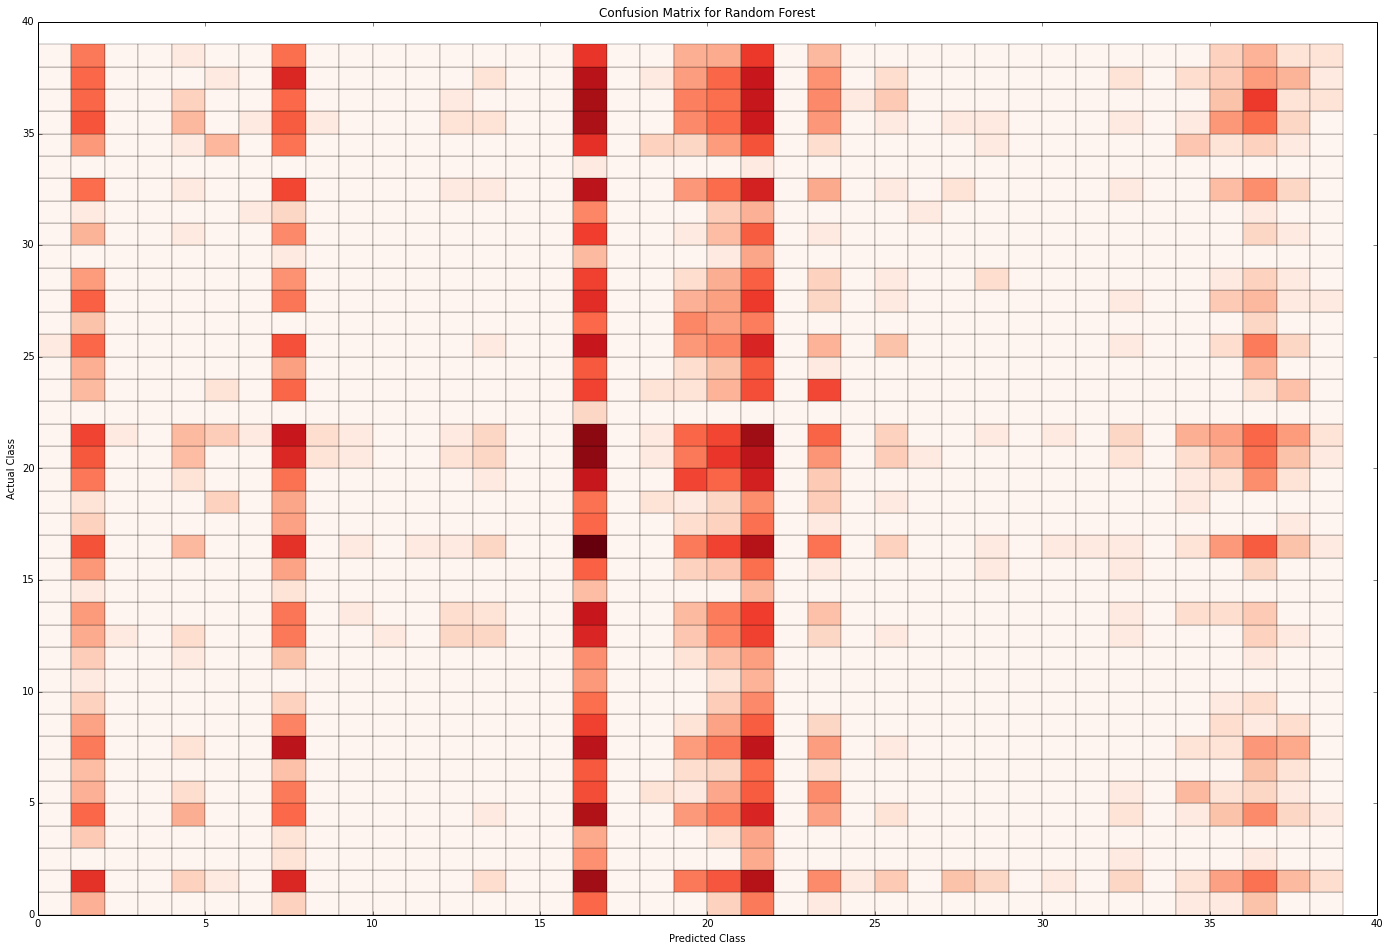

In [28]:
import matplotlib.pyplot as plt

# Plot confusion matrix for RF
plt.pcolor(np.log1p(conf_rf),cmap=plt.cm.Reds,edgecolors='k')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [27]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (24.0, 16.0)

In [32]:
le_crime.inverse_transform(20)

'NON-CRIMINAL'